In [43]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import sys

In [58]:
path = r'C:\Users\Alina\Desktop\filess'

# read an excel file and convert
# into a dataframe object
all_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]

list_of_dfs = [pd.read_csv(file, sep=';', encoding='cp1251') for file in all_files]

df = pd.concat(list_of_dfs, ignore_index=True)
print(sys.getsizeof(df))
sys.getsizeof(list_of_dfs)

2574432


184

In [19]:
all_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
[(pd.read_csv(file, sep = ';'), print(file)) for file in all_files]


C:\Users\Alina\Desktop\csv\3652.70_PorRhob.csv
C:\Users\Alina\Desktop\csv\3653.45_PorRhob.csv
C:\Users\Alina\Desktop\csv\3654.20_PorRhob.csv
C:\Users\Alina\Desktop\csv\3654.95_PorRhob.csv
C:\Users\Alina\Desktop\csv\3655.70_PorRhob.csv
C:\Users\Alina\Desktop\csv\3656.45_PorRhob.csv
C:\Users\Alina\Desktop\csv\3657.20_PorRhob.csv
C:\Users\Alina\Desktop\csv\3657.95_PorRhob.csv
C:\Users\Alina\Desktop\csv\3658.70_PorRhob.csv
C:\Users\Alina\Desktop\csv\3659.45_PorRhob.csv
C:\Users\Alina\Desktop\csv\3660.20_PorRhob.csv
C:\Users\Alina\Desktop\csv\3660.95_PorRhob.csv
C:\Users\Alina\Desktop\csv\3661.70_PorRhob.csv
C:\Users\Alina\Desktop\csv\3662.45_PorRhob.csv
C:\Users\Alina\Desktop\csv\3663.20_PorRhob.csv
C:\Users\Alina\Desktop\csv\3663.95_PorRhob.csv
C:\Users\Alina\Desktop\csv\3664.70_PorRhob.csv
C:\Users\Alina\Desktop\csv\3665.45_PorRhob.csv
C:\Users\Alina\Desktop\csv\3666.20_PorRhob.csv
C:\Users\Alina\Desktop\csv\3666.95_PorRhob.csv
C:\Users\Alina\Desktop\csv\3667.70_PorRhob.csv
C:\Users\Alin

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 104: invalid continuation byte

In [53]:
#[(df['Rhob_0-256'] , df['Depth'], df ['Vp'], df['Vs'], df['E'], df['v'])]
df.describe()

,Depth,X,Y,R,S,Rhob_0-256,S_0-256,Por_0-256,Rhob_0-40,S_0-40,Por_0-40,N,Depth.1,Vp,Vs,E,G,K,v
count,10908.000000,10908.000000,10908.000000,10908.000000,10908.000000,10306.000000,10908.000000,10306.0,66.000000,10908.000000,66.000000,10908.000000,10908.000000,10306.000000,10306.000000,1.030600e+04,1.030600e+04,1.030600e+04,10306.000000
mean,3656.056483,251.367345,257.438944,179.561881,86672.609278,2.751514,81884.360194,100.0,0.646577,2.284287,0.443299,646.024844,3656.056483,6220.535337,4398.582719,1.074826e+08,5.374128e+07,3.582752e+07,0.053519
std,1.949082,7.761392,10.796484,3.170201,5690.107987,0.053412,20584.055874,0.0,0.216254,42.976077,0.455265,350.206535,1.949082,493.798032,349.167937,2.077579e+07,1.038789e+07,6.925262e+06,0.061421
min,3652.700000,233.000000,236.000000,176.000000,14645.000000,2.000938,-1.000000,100.0,0.434770,-1.000000,0.001134,29.000000,3652.700000,1735.751108,1227.361379,6.028489e+06,3.014244e+06,2.009496e+06,-0.111214
25%,3654.372050,247.000000,250.000000,177.000000,84378.000000,2.723250,84263.000000,100.0,0.465114,0.000000,0.035739,343.000000,3654.372050,5955.292074,4211.027409,9.658142e+07,4.829071e+07,3.219381e+07,0.000000
50%,3656.039900,250.000000,255.000000,178.000000,86278.000000,2.748029,86278.000000,100.0,0.524655,0.000000,0.336988,646.000000,3656.039900,6175.023338,4366.400876,1.047849e+08,5.239243e+07,3.492829e+07,0.064582
75%,3657.732350,258.000000,267.000000,181.000000,89649.000000,2.773538,89649.000000,100.0,0.814949,0.000000,0.732486,949.000000,3657.732350,6407.512295,4530.795395,1.138710e+08,5.693548e+07,3.795698e+07,0.076363
max,3659.430200,282.000000,279.000000,185.000000,92170.000000,3.227244,92170.000000,100.0,1.093030,1305.000000,1.479323,1267.000000,3659.430200,11745.735530,8305.489243,4.452380e+08,2.226190e+08,1.484127e+08,2.055799


In [59]:
Vp = df['Rhob_0-256']**4 / 0.31**4
Vs = Vp/np.sqrt(2)
E = df['Rhob_0-256'] * Vs**2 * (3*Vp**2 - 4*Vs**2)/(Vp**2 - Vs**2) #модуль Юнга
G = df['Rhob_0-256'] * Vs**2 #модуль сжатия
K = df['Rhob_0-256'] * (Vp**2 - 4/3*(Vs**2)) #коэффициент всестороннего сжатия
v = (Vp**2 - 2*Vs**2) / 2 * (Vp**2 - Vs**2) #коэффициент Пуассона

In [60]:
df['Vp'] = True
df['Vs'] = True
df['E'] = True
df['G'] = True
df['K'] = True
df['v'] = True

df['Vp'] = Vp
df['Vs'] = Vs
df['E'] = E
df['G'] = G
df['K'] = K
df['v'] = v

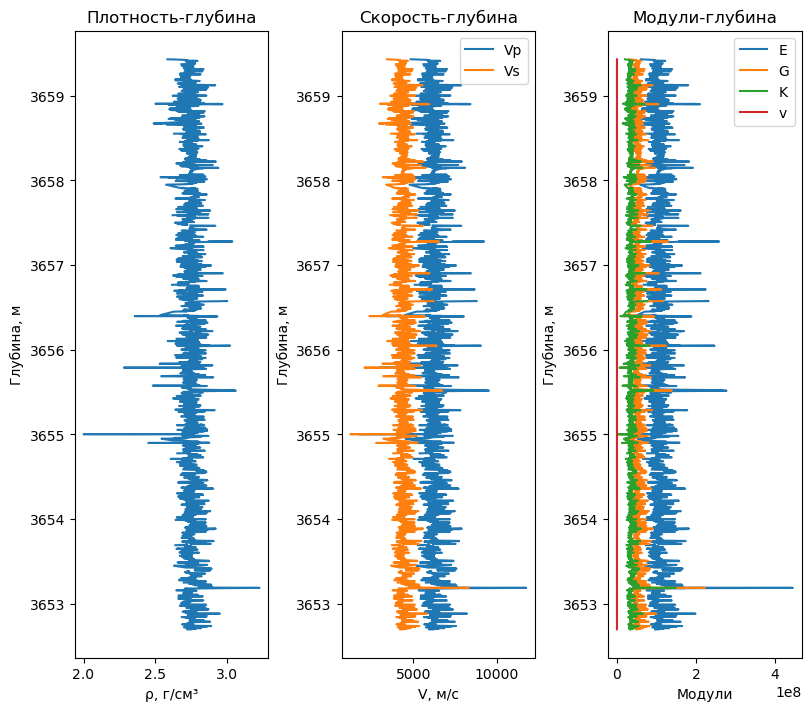

In [61]:
fig, axs = plt.subplots(1, 3, figsize = (8, 7), layout = 'constrained')

axs[0].plot(df['Rhob_0-256'],df['Depth'])  # Plot some data on the (implicit) axes.
axs[0].set_title('Плотность-глубина')
axs[0].set_xlabel('ρ, г/см³')
axs[0].set_ylabel('Глубина, м')

axs[1].plot(df['Vp'],df['Depth'], label = 'Vp')
axs[1].plot(df['Vs'],df['Depth'], label = 'Vs')
axs[1].set_title('Скорость-глубина')
axs[1].set_xlabel('V, м/c')
axs[1].set_ylabel('Глубина, м')
axs[1].legend()

axs[2].plot(df['E'],df['Depth'], label = 'E')
axs[2].plot(df['G'],df['Depth'], label = 'G')
axs[2].plot(df['K'],df['Depth'], label = 'K')
axs[2].plot(df['v'],df['Depth'], label = 'v')
axs[2].set_title('Модули-глубина')
axs[2].set_xlabel('Модули')
axs[2].set_ylabel('Глубина, м')
axs[2].legend()

In [34]:
# Save content
df.to_csv('saved_skv150.csv',
          index=False)